<a href="https://colab.research.google.com/github/ParasharSneha/Project/blob/main/diagnosis_of_pneumonia_by_cnn_classifier2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p><center style="font-family:newtimeroman;font-size:180%;">Pneumonia Classification by Tensorflow </center></p>
### Table of contents:

* [Introduction](#1)
* [Import Libraries](#2)
* [Import Dataset](#3)
* [Visualization Of Dataset](#4)
* [Preprocessing Data](#5)
* [Train & Compile a CNN Model](#6)
* [Evaluate The Model](#7)
* [Save Model](#8)

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Introduction</p>

In [1]:
!pip install --upgrade pip

In [ ]:
!pip install tensorflow

In [3]:
!pip install -q kaggle

!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 /root/.kaggle/kaggle.json

! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

! unzip chest-xray-pneumonia.zip

<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Import libraries</p>

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install matplotlib

In [ ]:
!pip install pandas

In [ ]:
!pip install seaborn

In [ ]:
pip install scikit-learn

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.image import  load_img
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

<a id="3"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import Data</p>
<a class="btn" href="#home">Tabel of Contents</a>

In [3]:
# Define image size and other parameters
img_width, img_height = 256,256
batchsize = 32
epochs = 10
num_of_class = 2

train = keras. utils.image_dataset_from_directory(
    directory='chest_xray/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

validation = keras. utils.image_dataset_from_directory(
    directory='chest_xray/val',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

test = keras. utils.image_dataset_from_directory(
    directory='chest_xray/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))


Found 6557 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


<a id="4"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Visualization Of Data </p>
<a class="btn" href="#home">Tabel of Contents</a>

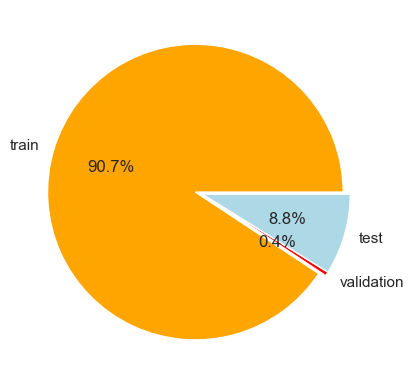

In [4]:
plt.pie([len(train), len(validation), len(test)],
        labels=['train', 'validation', 'test'], autopct='%.1f%%', colors=['orange', 'red', 'lightblue'], explode=(0.05, 0, 0))
plt.show()

In [5]:
print(train.class_names)
print(validation.class_names)
print(test.class_names)

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


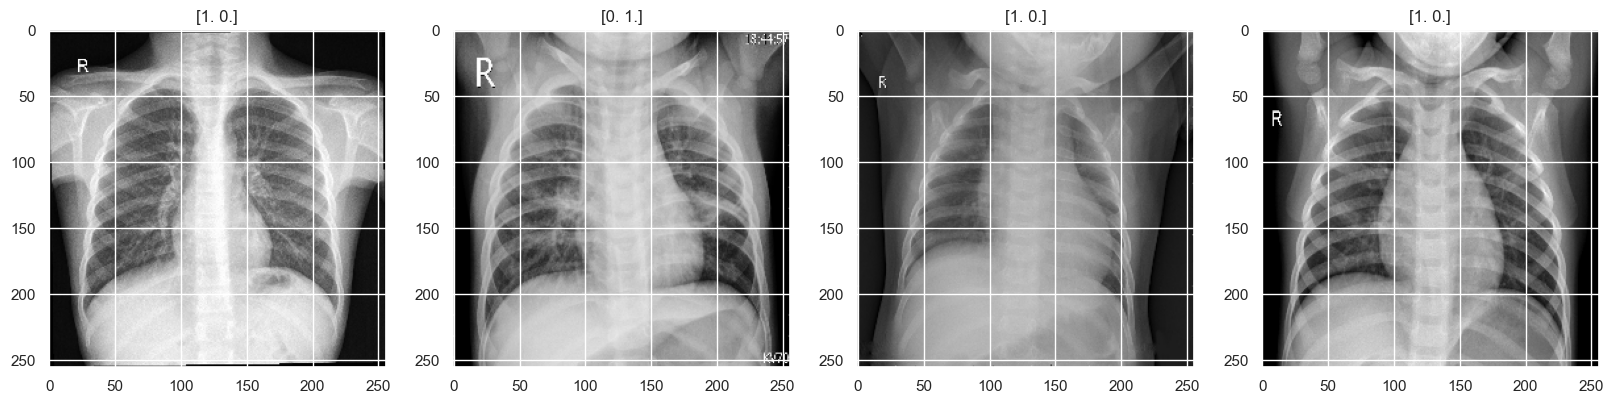

In [6]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

<a id="5"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Preprocessing Data </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [7]:
# Extracting Features and Labels
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature.numpy())
    y_train.append(label.numpy())

for feature, label in test:
    x_test.append(feature.numpy())
    y_test.append(label.numpy())

for feature, label in validation:
    x_val.append(feature.numpy())
    y_val.append(label.numpy())

# Concatenate the lists to get the full 'x' and 'y' arrays
x_train = np.concatenate(x_train, axis=0)
x_val = np.concatenate(x_val, axis=0)
x_test = np.concatenate(x_test, axis=0)
y_train = np.concatenate(y_train, axis=0)
y_val = np.concatenate(y_val, axis=0)
y_test = np.concatenate(y_test, axis=0)


In [8]:
# check the shapes of 'x_train' and 'y_train':
print("Shape of 'x_train':", x_train.shape)
print("Shape of 'y_train':", y_train.shape)
print("Shape of 'x_val':", x_val.shape)
print("Shape of 'y_val':", y_val.shape)
print("Shape of 'x_test':", x_test.shape)
print("Shape of 'y_test':", y_test.shape)

Shape of 'x_train': (6557, 256, 256, 3)
Shape of 'y_train': (6557, 2)
Shape of 'x_val': (16, 256, 256, 3)
Shape of 'y_val': (16, 2)
Shape of 'x_test': (624, 256, 256, 3)
Shape of 'y_test': (624, 2)


In [9]:
# Pixel Value Scaling for Datasets: Normalizing and Standardizing the Data
x_train=x_train/256
x_val=x_val/256
x_test=x_test/256

<a id="6"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Train and Compile a Model </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [10]:
# We use transfer learning with VGG16 as the base model
def CNN_Model():
    base_model = VGG16(weights='imagenet', include_top = False, input_shape=(img_width, img_height, 3))
    # Freeze the base model
    for layer in base_model.layers:
        layer.trainable = False

    for i in range(3):
        base_model.layers[-2-i].trainable = True

    CNN = Sequential()
    CNN.add(Input(shape=(img_width, img_height,3)))
    CNN.add(base_model)
    CNN.add(Flatten())
    CNN.add(Dropout(0.3))
    CNN.add(Dense(128, activation='relu', kernel_regularizer=l2(0.02)))
    CNN.add(Dropout(0.2))
    CNN.add(Dense(2, activation='sigmoid'))

    return CNN

# Training The CNN
model = CNN_Model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
# Visualized Layers of CNN
keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4194432   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 18909378 (72.13 MB)
Trainable params: 1127

In [11]:
hist = model.fit(x_train, y_train, epochs= epochs, validation_data= (x_val, y_val))
print(hist.history)
best_score = max(hist.history['val_accuracy'])
print(f"Best Validation score is: {best_score}")

Epoch 1/10
205/205 [==============================] - 647s 3s/step - loss: 0.7736 - accuracy: 0.9105 - val_loss: 0.1740 - val_accuracy: 1.0000
Epoch 2/10
205/205 [==============================] - 661s 3s/step - loss: 0.1910 - accuracy: 0.9750 - val_loss: 0.1700 - val_accuracy: 0.9375
Epoch 3/10
205/205 [==============================] - 692s 3s/step - loss: 0.0897 - accuracy: 0.9864 - val_loss: 0.1997 - val_accuracy: 0.9375
Epoch 4/10
205/205 [==============================] - 653s 3s/step - loss: 0.0583 - accuracy: 0.9905 - val_loss: 0.0505 - val_accuracy: 1.0000
Epoch 5/10
205/205 [==============================] - 656s 3s/step - loss: 0.0444 - accuracy: 0.9928 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 6/10
205/205 [==============================] - 655s 3s/step - loss: 0.0570 - accuracy: 0.9910 - val_loss: 0.0349 - val_accuracy: 1.0000
Epoch 7/10
205/205 [==============================] - 679s 3s/step - loss: 0.0771 - accuracy: 0.9901 - val_loss: 0.0272 - val_accuracy: 1.0000

<a id="7"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Evaluate The Model </p>
<a class="btn" href="#home">Tabel of Contents</a>

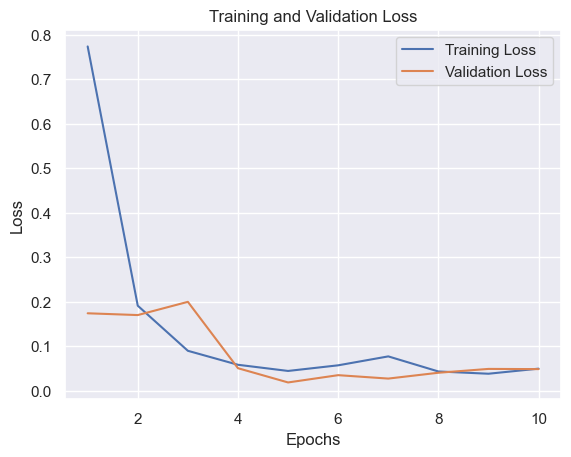

In [12]:
# Extract the training and validation loss values from the history object
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_loss) + 1)

# Plot the loss graph
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

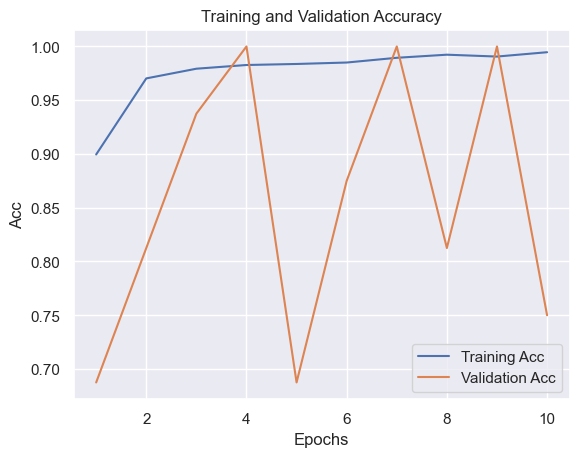

In [15]:
# Extract the training and validation loss values from the history object
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_accuracy) + 1)

# Plot the loss graph
plt.plot(epochs, train_accuracy , label='Training Acc')
plt.plot(epochs, val_accuracy, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
print("Loss of model:", model.evaluate(x_test,y_test)[0])
print("Accuracy of model:", model.evaluate(x_test,y_test)[1]*100,"%")

20/20 [==============================] - 51s 3s/step - loss: 1.9141 - accuracy: 0.7420
Loss of model: 1.9141265153884888
20/20 [==============================] - 52s 3s/step - loss: 1.9141 - accuracy: 0.7420
Accuracy of model: 74.19871687889099 %


In [14]:
pred = model.predict(x_test)
for i in range(len(pred)):
  pred[i] = 1 if pred[i].any()>0.5 else 0

20/20 [==============================] - 52s 3s/step


In [15]:
print(classification_report(y_test,
                            pred,
                            target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.38      1.00      0.55       234
   Normal (Class 1)       0.62      1.00      0.77       390

          micro avg       0.50      1.00      0.67       624
          macro avg       0.50      1.00      0.66       624
       weighted avg       0.53      1.00      0.69       624
        samples avg       0.50      1.00      0.67       624



In [16]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [17]:
pred


array([[1., 1.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)

In [25]:
cm = confusion_matrix(y_test, pred)
cm = pd.DataFrame(cm , index=['0','1'])
cm


ValueError: multilabel-indicator is not supported

<a id="8"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Save Model  </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [18]:
# Save the model
model.save('CNN_model_c.h5')
print ("Model saved successfully!")

Model saved successfully!


In [19]:
! pip install  gradio

In [32]:
def PneumoniaPrediction(img):
  img = np.array(img)/256
  img = img.resize(256,256)
  isPneumonic = model.predict(img)[0]
  imgClass = "Normal" if isPneumonic>0.5 else "Pneumonic"
  print(isPneumonic)
  return imgClass

In [54]:
import gradio

def PneumoniaPrediction(img):
    img = img / 256
    img = tf.image.resize(img, (img_width, img_height))
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    isPneumonic = prediction[0][0]
    imgClass = "Normal" if isPneumonic > 0.5 else "Pneumonic"
    return imgClass

input_image = gradio.inputs.Image(shape=(256, 256))
output_label = gradio.outputs.Label()

gr_interface = gradio.Interface(fn=PneumoniaPrediction, inputs=input_image, outputs=output_label)
gr_interface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 183ms/step


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "C:\Users\rajesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 408, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rajesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\uvicorn\middleware\proxy_headers.py", line 84, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rajesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastapi\applications.py", line 289, in __call__
    await super().__call__(scope, receive, send)
  File "C:\Users\rajesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\starlette\applications.py", line 122, in __call__
    await self.middleware_stack(scope, receive, send)
  File "C:\Users\rajesh\AppData\Local\Programs\Python\Python31

1/1 [==============================] - 0s 233ms/step


In [50]:
pr = model.predict(x_test)
for i in range(len(pr)):
  if pr[i].any()>0.5:
    pr[i]=1
  else:
    pr[i]=0

20/20 [==============================] - 70s 3s/step


In [51]:
import gradio 

def pneumoniapred(img):
    img = np.array(img)/256
    img = img.reshape(256,256)
    isPneumonic = model.predict(img)[0]
    imgClass = "Normal" if isPneumonic<0.5 else "Pneumonic"
    return imgClass

pr = model.predict(x_test)
for i in range(len(pr)):
    if pr[i].any()>0.5:
        pr[i]=1
    else:
        pr[i]=0

img = gradio.inputs.Image(shape=(256,256))
label= gradio.outputs.Label(num_top_classes=1)

interface = gradio.Interface(fn=pneumoniapred,
                             inputs=img,
                             outputs=label,
                             interpretation="default")
interface.launch(debug=True,share=True)

In [52]:
img = gradio.inputs.Image(shape=(256,256))
label = gradio.outputs.Label(num_top_classes=1)


In [53]:
interface = gradio.Interface(fn = PneumoniaPrediction,
                             title = "Pneumonia Detection using Chest X-Ray",
                             inputs = img,
                             outputs = label,
                             interpretation = "default"
                             )
interface.launch(debug=True , share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


Traceback (most recent call last):
  File "C:\Users\rajesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\routes.py", line 488, in run_predict
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rajesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py", line 1431, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rajesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rajesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\anyio\to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rajesh\AppData\Local\Programs\Python\Python311\Lib

Keyboard interruption in main thread... closing server.
